# Introduction 

Sign language is a visual mean of communication that uses gestures, body language and different facial expressions in order to allow those who use it to communicate with one another. It is mainly used by deaf or hard-of-hearing people all over the world. Just like any other spoken language there are many distinct sing languages. This particular dataset is about the American Sign Language (ASL). 

## The dataset

The [dataset](https://www.kaggle.com/datasets/ardamavi/27-class-sign-language-dataset) is an image dataset (the images are in nympy array format). It consists of many different images showing letters and numbers of the ASL, provided by 173 individuals. The images belong to a total of 27 classes as shown below:

In [1]:
# Define the HTML for the lists
html_content = """
<div style="display: flex; justify-content: space-around;">
  <div>
    <ul>
      <li> '0'</li>
      <li> '1'</li>
      <li> '2'</li>
      <li> '3'</li>
      <li> '4'</li>
      <li> '5'</li>
      <li> '6'</li>
      <li> '7'</li>
      <li> '8'</li>
      <li> '9'</li>
      <li> 'NULL'</li>
    </ul>
  </div>
  <div>
    <ul>
      <li>'a'</li>
      <li>'b'</li>
      <li>'bye'</li>
      <li>'c'</li>
      <li>'d'</li>
      <li>'e'</li>
      <li>'good'</li>
      <li>'good morning'</li>
      <li>'hello'</li>
      <li>'little bit'</li>
      <li>'no'</li>
      <li>'pardon'</li>
      <li>'please'</li>
      <li>'project'</li>
      <li>'whats up'</li>
      <li>'yes'</li>

    </ul>
  </div>
</div>
"""

# Display the HTML content
from IPython.display import display, HTML
display(HTML(html_content))

## Previous work done on the dataset
There has been significant work done on this specific problem, using different approaches such as [Two-streamed mixed CNN](https://www.mdpi.com/1424-8220/22/16/5959) which reached 97.57% accuracy.

Another study using [Deep Learning Technology](https://www.mdpi.com/1424-8220/23/18/7970) managed to provide great insight and results reaching 94-99% accuracies.


# Preprocessing

The first thing we must do is import the necessary libraries. These libraries are needed to modify, visualize and process our data and results in order to understand both the problem we are trying to solve and its outputs.

In [2]:
import numpy as np  #for numerical computations and array manipulations.
import pandas as pd #data manipulation and analysis
import os    #used for file and directory operations
import random
import keras  #used to build and train deep learning models.
import sklearn
import seaborn as sns #data visualization used for making statistical graphics.
import cv2  #used for image processing

import tensorflow as tf
import matplotlib.pyplot as plt #for graphs and images
from PIL import Image #for opening, manipulating, and saving images
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder  #converting categorical labels into a numerical
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, hamming_loss, jaccard_score, confusion_matrix, classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import convert_to_tensor

## Loading the images

The images of our dataset are stored in numpy files which are widely used for storing arrays, therefore we must upload the two files, namely "X.npy" and "Y.npy". The first file contains all of the images/features while the second one consists of the different labels that describe what each gesture portrayed symbolizes. 

It is important to note that the specific format of the dataset is very convenient since it is compatible with a framework like Keras which we will use, without needing any further alterations.


In [3]:
#the directory where the dataset is
input_dir = os.path.join("27_class_sign_language_dataset")
#the full paths to each one of the files containing the images and the labels
x_filename = os.path.join(input_dir, "X.npy")
y_filename = os.path.join(input_dir, "Y.npy")

#loading the data from the .npy files
x = np.load(x_filename)
y = np.load(y_filename)


We will show some samples in order to see if the images were properly loaded as well as their resolution, labels etc.

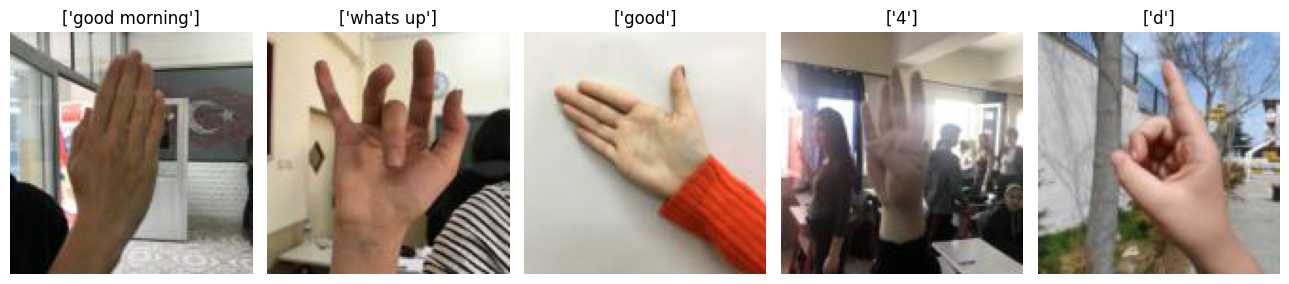

In [4]:
#this creates a figure with 5 subplots while also setting the sizes
fig, axes = plt.subplots(1, 5, figsize=(13, 4))

#ensuring that the arrays containing the images and labels have the same size
assert x.shape[0] == y.shape[0], "The image and label arrays are not of the same size"

for i in range(0, 5):
    r = random.randrange(1, 22000)
    #display the image with the index r 
    axes[i].imshow(x[r])
    #set the title of the subplot to be the label of index r
    axes[i].set_title(y[r])
    axes[i].axis('off')

#making sure each subplot fits within the figure area
plt.tight_layout()

plt.show()

## Resizing

The resolution of our images seems to be 128x128, converting it to 64x64 while maintaining the RGB feature, seems to produce adequate results while also keeping the computational demands relatively low.

In [5]:
#define the new dimensions for resizing
new_height = 64
new_width = 64

#initialize an array to store resized images
X = np.empty((x.shape[0], new_height, new_width, x.shape[3]), dtype=x.dtype)

#resize each image using OpenCV
for i, image in enumerate(x):
    resized_image = cv2.resize(image, (new_width, new_height))  
    X[i] = resized_image  


Now we will show some of the resized images to ensure that the process was completed succesfully.

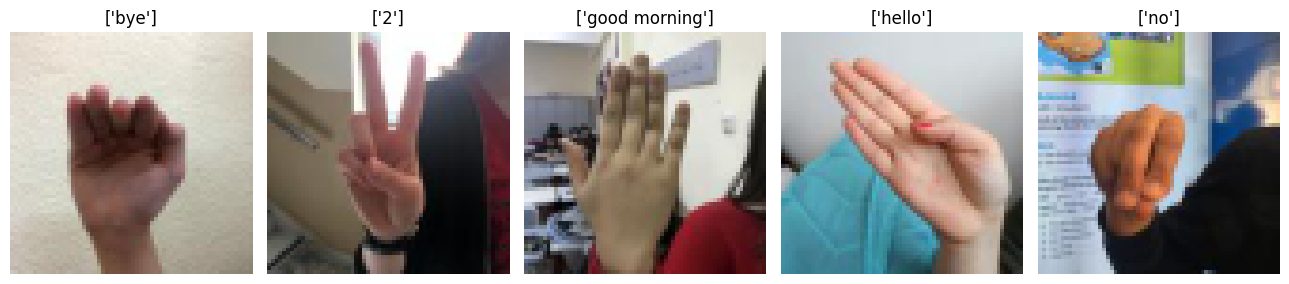

In [6]:
#this creates a figure with 5 subplots while also setting the sizes
fig, axes = plt.subplots(1, 5, figsize=(13, 4))

#ensuring that the arrays containing the images and labels have the same size
assert x.shape[0] == y.shape[0], "The image and label arrays are not of the same size"

for i in range(0, 5):
    r = random.randrange(1, 22000)
    #display the image with the index r 
    axes[i].imshow(X[r])
    #set the title of the subplot to be the label of index r
    axes[i].set_title(y[r])
    axes[i].axis('off')

#making sure each subplot fits within the figure area.
plt.tight_layout()

plt.show()


## Splitting the dataset

The total amount of images that have been loaded from the previous steps must be split into train and test sets. The first will be used to fit the model and the model and the second to evaluate the results of the fitting. We chose 80-20% train-test split.


In [7]:
x_train, x_test, y_train, y_test = train_test_split(
  X, y, test_size=0.2, random_state=42
)

"x_train" now contains the images that will be used for training, "y_train" contains their corresponding labels. The images and labels that will be used for training are contained in "x_test" and "y_test" accordingly.

In [8]:
assert x_train.shape[0] == y_train.shape[0], "Number of images and labels must match"

print("Image shape:", x_train.shape[1:]) 
print("Train set size:", x_train.shape[0])
print("Test set size:", x_test.shape[0])

Image shape: (64, 64, 3)
Train set size: 18240
Test set size: 4561


We can see there are 18240 images in the train set and 4561 images in the test set. Also the shape of the RGB images is now (64, 64, 3) showing that the size was indeed reduced to half.

## Data augmentation 

We will perform data augmentation using [ImageDataGenerator](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator). More specifically we will rotate, shift, shear, zoom into and flip our images. This provides us with many altered versions of each of the original images. Enriching the training set ensures better training of the model.

In [9]:
#create an ImageDataGenerator instance with the desired augmentations
datagen = ImageDataGenerator(
    #randomly rotate in the range (0 to 180)  
    rotation_range=20,       
    #randomly shift images horizontally (fraction of total width)
    width_shift_range=0.1, 
    #randomly shift images vertically (fraction of total height)  
    height_shift_range=0.1,  
    #shear intensity (counter-clockwise direction in degrees)
    shear_range=0.2,  
    #randomly zoom into images       
    zoom_range=0.2,      
    #randomly flip images horizontally    
    horizontal_flip=True,
    #randomly flip images vertically
    vertical_flip=True      
)

We will now apply the transformations that we defined above to our train set.

In [10]:
datagen.fit(x_train)

#configure batch size and generate augmented data
batch_size = 32
augmented_data_generator = datagen.flow(x_train, y_train, batch_size=batch_size)

We will show some examples of the augmented images and their corresponding labels.

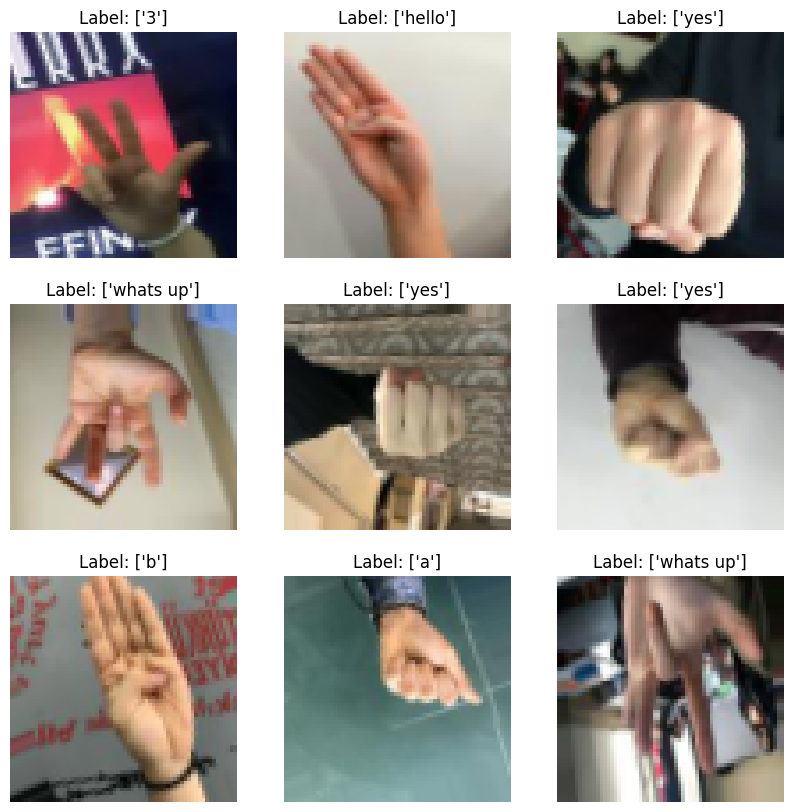

In [11]:
#example of iterating through augmented batches and displaying images
for i in range(1):  #loop over one batch
    batch_images, batch_labels = augmented_data_generator[i] 
    
    #plotting the first 9 images in the batch
    plt.figure(figsize=(10, 10))
    for j in range(9):
        plt.subplot(3, 3, j + 1)
        plt.imshow(batch_images[j])  
        plt.title(f"Label: {batch_labels[j]}")  
        plt.axis('off')
    plt.show()

## Normalization

Normalizing our data helps improve the stability and performance of the model by eliminating absolute values and inherent biases.

We will print the value interval of our train and test set.

In [12]:
print(f"Value interval of the train set :[{x_train.min()},{x_train.max()}]")
print(f"Value interval of the test set :[{x_test.min()},{x_test.max()}]")

Value interval of the train set :[0.0,1.0]
Value interval of the test set :[0.0,1.0]


We can see that our images are already in the (0,1) range so there is no need for normalization.

# CNN
CNNs are mostly used for image data, since convolutional operations detect the patterns that exist in the input images and such patterns can be recognized regardless of where they are located in the image. 

## Building the model
In the given problem the gestures are positioned in the center of the image and have characteristics that the model can learn to recognize. The pooling layers are used to reduce the spatial dimensions and force the model to retain the most important features.

The dropout layers are used to prevent overfitting. The flatten layer transforms the data into a vector that will then be used as input to the dense layer in order to produce the final probability for each class that each image can belong to.

In [13]:
cnn_model = keras.models.Sequential([keras.layers.Conv2D(filters=64, 
                                                        kernel_size=(5,5), 
                                                        padding="same", 
                                                        activation="relu", 
                                                        input_shape=(64,64,3)),   #this is the size of my images
                                     keras.layers.MaxPooling2D(pool_size=(3,3)),
                                     keras.layers.Conv2D(filters=128,
                                                        kernel_size=(5,5),
                                                        padding="same",
                                                        activation="relu"),
                                     keras.layers.MaxPooling2D(pool_size=(3,3)),
                                     keras.layers.Conv2D(filters=256,
                                                        kernel_size=(5,5),
                                                        padding="same",
                                                        activation="relu"),    
                                     keras.layers.MaxPooling2D(pool_size=(3,3)),
                                     keras.layers.Dropout(rate=0.25),
                                     keras.layers.Flatten(), 
                                     keras.layers.Dropout(rate=0.5),
                                     keras.layers.Dense(units=256, 
                                                        activation="relu"),
                                     #using softmax to get the inputs as a probability distribution 
                                     keras.layers.Dense(units=27,   #this is the number of classes
                                                        activation="softmax")
                                    ]
                                   ) 
cnn_model.summary()

c:\Users\User\miniconda3\envs\tf-gpu\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 64)     │         4,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 21, 21, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 21, 21, 128)    │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 256)      │       819,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 27)             │         6,939 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,298,587 (4.95 MB)

 Trainable params: 1,298,587 (4.95 MB)

 Non-trainable params: 0 (0.00 B)

We can see a summary of our model and the total number of parameters that it uses.

We compile our model using the "adam" optimizer.


In [14]:
cnn_model.compile(
                  loss="categorical_crossentropy", 
                  optimizer="adam", 
                  metrics=["accuracy"] 
)

## Training the model
First we will convert our labels to categorical in order to train and evalute our model.


In [15]:
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(y_train)
test_labels_encoded = label_encoder.transform(y_test)

#print the number of unique classes
num_classes = len(np.unique(train_labels_encoded))
print("Number of unique classes:", num_classes)

#convert numeric labels to categorical (one-hot encoded) values
train_labels_categorical = keras.utils.to_categorical(train_labels_encoded, num_classes=num_classes)
test_labels_categorical = keras.utils.to_categorical(test_labels_encoded, num_classes=num_classes)


Number of unique classes: 27


c:\Users\User\miniconda3\envs\tf-gpu\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\User\miniconda3\envs\tf-gpu\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


We will now train our model using the train set and splitting a validation set of 20% from it in order to continuously evaluate the training process.

In [16]:
#training process using fit()
history = cnn_model.fit(x_train, 
                       train_labels_categorical,   
                       epochs=30,
                       batch_size=128,
                       validation_split=0.2, 
                       verbose = 0
                      )

## Evaluating the model

The following plots show the 'Cross-Entropy' loss and the 'Accuracy' that are used to assess the model through the different epochs.


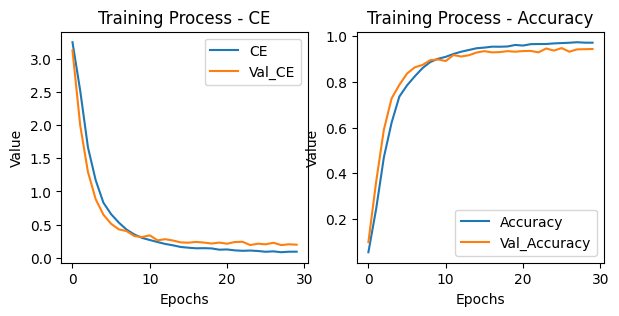

In [17]:
fig, axis = plt.subplots(nrows=1,ncols=2, figsize=(7,3))

axis[0].plot(history.epoch, history.history['loss']) 
axis[0].plot(history.epoch, history.history['val_loss']) 
axis[0].set_xlabel("Epochs") 
axis[0].set_ylabel("Value") 
axis[0].legend(["CE", "Val_CE"]) 
axis[0].set_title("Training Process - CE") 

axis[1].plot(history.epoch, history.history['accuracy'])
axis[1].plot(history.epoch, history.history['val_accuracy'])
axis[1].set_xlabel("Epochs") 
axis[1].set_ylabel("Value") 
axis[1].legend(["Accuracy", "Val_Accuracy"])
axis[1].set_title("Training Process - Accuracy")
plt.show()

We will evaluate our model using several metrics, namely 'accuracy', 'precision', 'recall' and 'f1-score'.

In [18]:
#the model makes a prediction with probabilities
predictions_nn_probs = cnn_model.predict(x_test, verbose = 0)

#each prediction is the maximum of the probabilities
predictions_nn = np.argmax(predictions_nn_probs, axis=1)

test_accuracy_nn = sklearn.metrics.accuracy_score(test_labels_encoded, predictions_nn)

print("The Accuracy of the Neural Network on the Test Data is", test_accuracy_nn)

print(classification_report(test_labels_encoded, predictions_nn))

The Accuracy of the Neural Network on the Test Data is 0.9526419644814733
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       202
           1       0.92      0.96      0.94       188
           2       0.93      0.88      0.90       155
           3       0.99      0.92      0.96       178
           4       0.94      0.91      0.93       184
           5       0.98      1.00      0.99       182
           6       0.95      0.86      0.90       168
           7       0.87      0.94      0.90       170
           8       0.91      0.96      0.94       182
           9       0.96      0.98      0.97       177
          10       0.90      0.80      0.84        54
          11       0.99      0.95      0.97       184
          12       0.90      0.96      0.93       149
          13       0.96      0.97      0.96       176
          14       0.96      0.96      0.96       184
          15       0.96      0.99      0.98       167
       


In the classification report we can see the metrics for each class of the dataset.

We will also produce a confusion matrix in order to gain a better understanding of the results of the classification process.


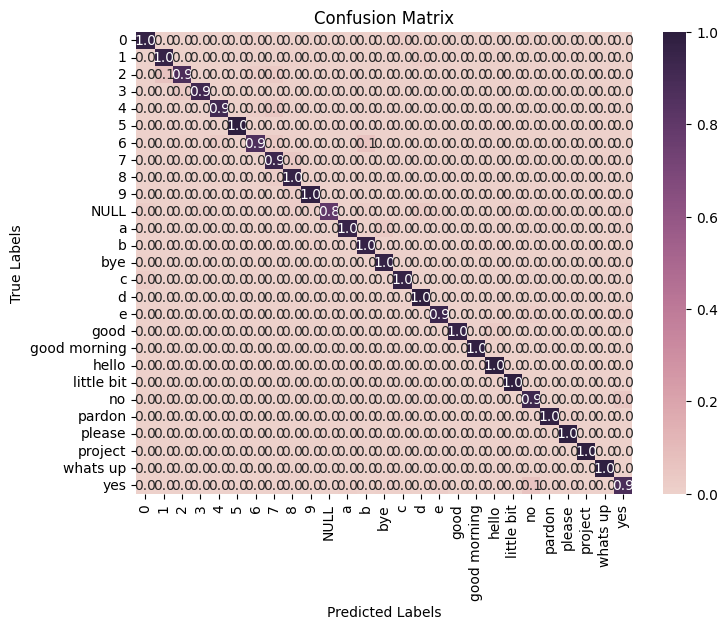

In [19]:
y_pred = cnn_model.predict(x_test, verbose = 0)
y_pred_labels = np.argmax(y_pred, axis=-1)  

class_names = np.unique(y)

#create the confusion matrix
cm = confusion_matrix(test_labels_encoded, y_pred_labels)


cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

#create a figure and axes
plt.figure(figsize=(8, 6))
ax = plt.axes()

#define my own color palette
palette = sns.color_palette('ch:s=-.2,r=.6')

#plot the confusion matrix
sns.heatmap(cm_normalized, annot=True, fmt=".1f", cmap=sns.cubehelix_palette(as_cmap=True), xticklabels=class_names, yticklabels=class_names, ax=ax)

#set labels, title, and ticks
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(class_names)
ax.yaxis.set_ticklabels(class_names)

#rotate x-axis tick labels if needed
plt.xticks(rotation=90)

#display the plot
plt.show()


It becomes evident from the accuracy as well as from the confusion matrix that for almost all of the classes, the labels that were correctly predicted are close to 96-97%. The model appears to make certain false predictions when trying to classify images of gestures that look a lot like one another.


## Label prediction


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


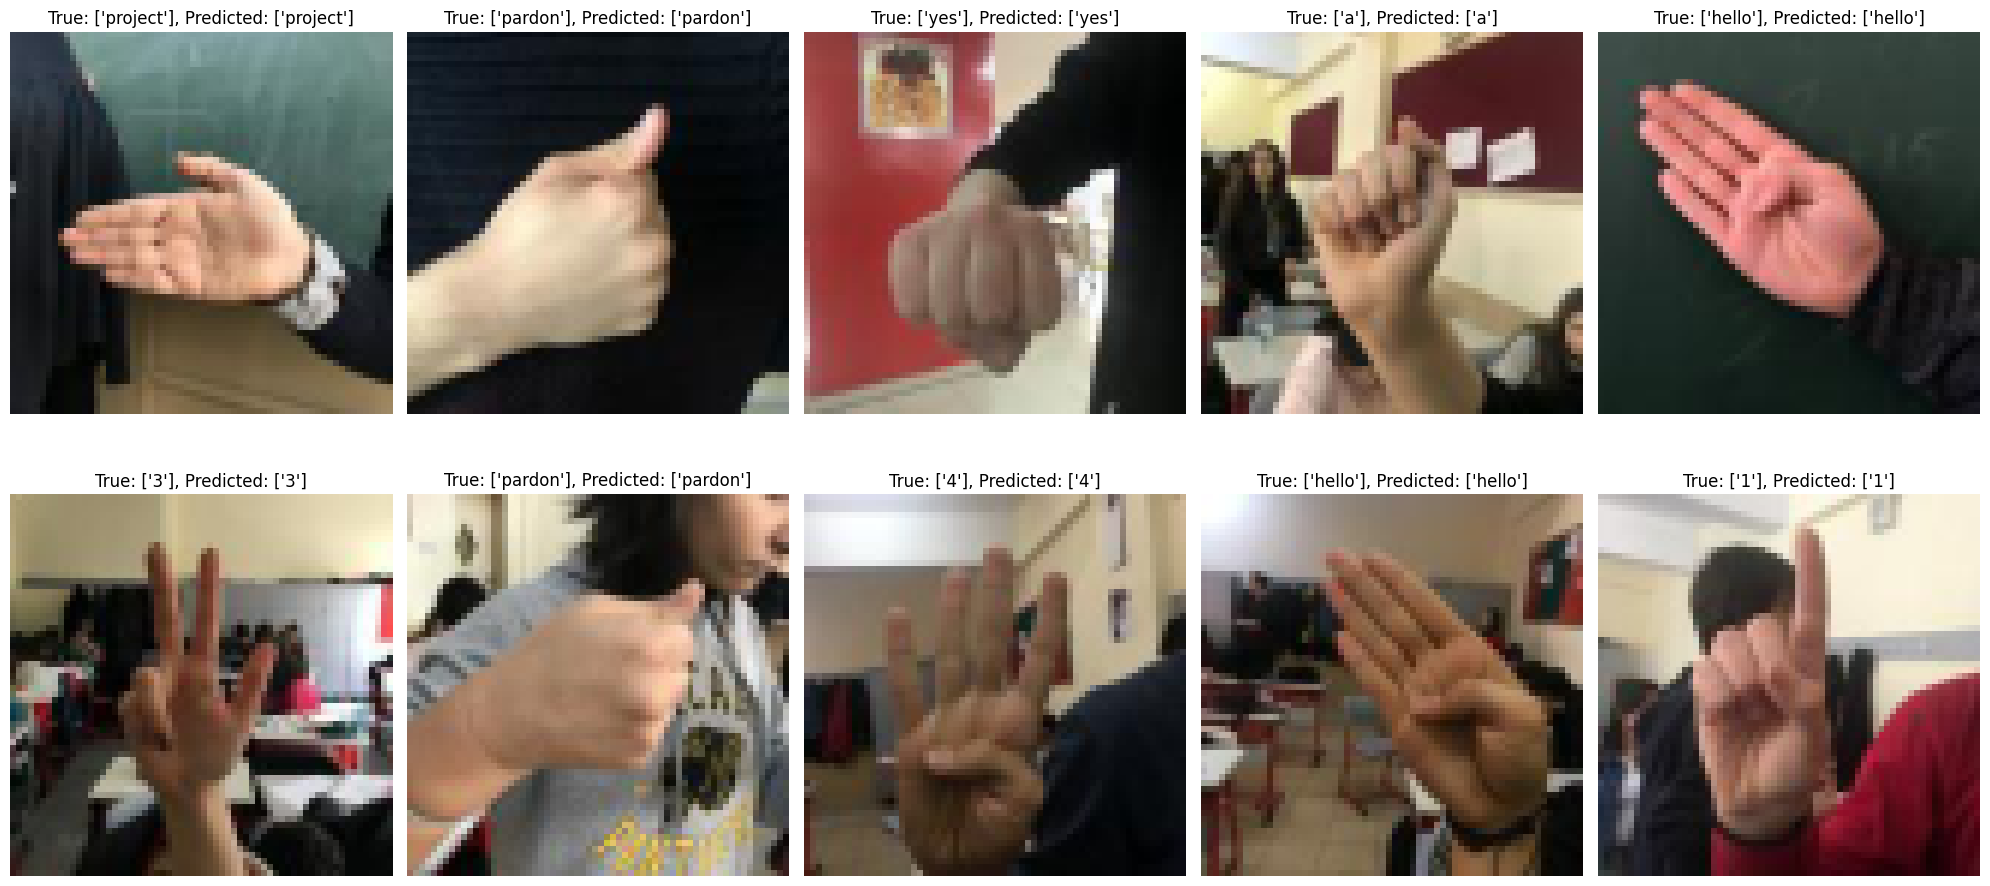

In [20]:
#test the model with randomly selected images from the test set
num_images_to_display = 10  # Number of images to display
#ensure different images with each run
indices_to_test = np.random.choice(len(x_test), size=num_images_to_display, replace=False)

#set up the figure for plotting images in a grid
plt.figure(figsize=(20, 10))

#iterate through the randomly selected indices of the test set
for i, idx in enumerate(indices_to_test):
    # Get the image and true label from the test set
    img = x_test[idx]
    true_label = y_test[idx]
    
    #predict the label for the image using the trained CNN model
    prediction_probs = cnn_model.predict(np.expand_dims(img, axis=0))
    predicted_label = np.argmax(prediction_probs)

    #plot each image in a subplot
    plt.subplot(2, 5, i + 1)  #2 rows, 5 columns for the grid of images
    plt.imshow(img)
    plt.title(f"True: {true_label}, Predicted: {true_label}")
    plt.axis('off')

#adjust layout and display
plt.tight_layout()

plt.show()

# Conclusion
The classification of sign language images is a task that seems to be achievable by relatively simple CNNs. Models that perform this type of classification can be incorporated in applications that assist people who use sign language in their day-to-day interactions, making communication faster and easier for all involved.